<a href="https://colab.research.google.com/github/y001003/yeardream/blob/main/math/ness_suff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as S
from sympy.utilities.autowrap import ufuncify

In [21]:
# 함수 f(x)를 심볼릭으로 정의 [+]
x_ = S.Symbol('x')

fx = S.expand(-(x_ - 2)**2 * (x_ - 4)**3)
fx

-x**5 + 16*x**4 - 100*x**3 + 304*x**2 - 448*x + 256

In [22]:
# fx로 부터 파이썬 함수형태로 변경
# https://pnavaro.github.io/python-notebooks/15-Sympy.html
f = ufuncify([x_], fx, backend='f2py') 

# def f(x):
#     return -(x**5 - 16*x**4 + 100*x**3 - 304*x**2 + 448*x - 256)

In [23]:
# fx를 미분
dfx = S.diff(fx, x_)

dfx

-5*x**4 + 64*x**3 - 300*x**2 + 608*x - 448

In [24]:
# 도함수도 파이썬 함수형태로 변경
df = ufuncify([x_], dfx, backend='f2py') 
# def df(x):
#     return -5*x**4 + 64*x**3 - 300*x**2 + 608*x - 448

In [27]:
# 한번 미분한 dfx를 =0 으로 두고 방정식 풀이 [+]
sols = np.array(S.solvers.solve(dfx, x_))
sols

array([2, 14/5, 4], dtype=object)

In [28]:
# 풀이된 x위치에서 함수값 계산 [+]
# 두개가 0으로 나오는데 이 둘다 로컬 미니멈인지 알 수 없음
f(sols)

array([0.     , 1.10592, 0.     ])

In [29]:
# 로컬 미니멈을 확인하기 위해 한번 더 미분
ddfx = S.diff(dfx, x_)
ddfx

-20*x**3 + 192*x**2 - 600*x + 608

In [30]:
ddf = ufuncify([x_], ddfx, backend='f2py') 
# def ddf(x):
#     return -20*x**3 + 192*x**2 - 600*x + 608

In [31]:
langs = []
lang1 = ["C", "C++", "JAVA"]
lang2 = ["Python", "Go", "C#"]
langs.append(lang1)
langs.append(lang2)
print(langs)
print(langs[0])
None
lang1 = ["C", "C++", "JAVA"]
lang2 = ["Python", "Go", "C#"]
lang1.append(lang2)
print(lang1)
print(lang1[0])
lang1 = ["C", "C++", "JAVA"]
lang2 = ["Python", "Go", "C#"]
langs = []
langs.extend(lang1)
langs.extend(lang2)
print(langs)
print(langs[0])

[['C', 'C++', 'JAVA'], ['Python', 'Go', 'C#']]
['C', 'C++', 'JAVA']
['C', 'C++', 'JAVA', ['Python', 'Go', 'C#']]
C
['C', 'C++', 'JAVA', 'Python', 'Go', 'C#']
C


In [ ]:
# 두 번 미분한 함수에서 함수각을 계산 ddf > 0 인 위치가 로컬 미니멈 [+]


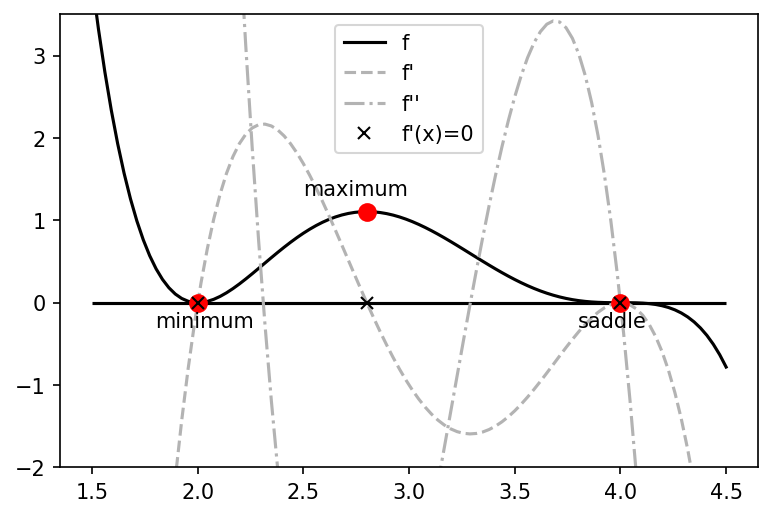

In [32]:
x = np.linspace(1.5, 4.5, 100)

fig = plt.figure(dpi=150)
ax = plt.axes()

ax.plot(x, f(x), label='f', color='k')
ax.plot(x, df(x), label="f'", color='0.7', ls='--')
ax.plot(x, ddf(x), label="f''", color='0.7', ls='-.')
ax.plot(sols, f(sols), 'o', markersize=8, c='r')
ax.plot(sols, [0, 0, 0], 'x', color='k', label="f'(x)=0")
ax.hlines(y=0, xmin=1.5, xmax=4.5)

ax.text(1.8, -0.3, 'minimum')
ax.text(2.5, 1.3, 'maximum')
ax.text(3.8, -0.3, 'saddle')

ax.legend()
ax.set_ylim([-2,3.5])
plt.show()